## Case Questions

<br>1)          Is there a relation between reviews from products which are bought together?<br>
<br>2)          What is the relation between the reviews and the helpfulness? <br>
<br>3)          What is the review behavior among different categories?<br>
<br>4)          Is there a relation between price and reviews? <br>
<br>5)          Optional - Any other hypothesis you think is interesting, as long it would have business value for Amazon


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from textblob import TextBlob
nlp = TextBlob
%matplotlib inline
start_initial = time.clock()

In [2]:
metadata = pd.read_csv('/Users/agni/Desktop/Thuisbezorgd/metadata-003.csv')

In [3]:
reviews_book = pd.read_csv('/Users/agni/Desktop/Thuisbezorgd/reviews_Books_5-004.csv')

In [4]:
reviews_clothes_jewelry = pd.read_csv('/Users/agni/Desktop/Thuisbezorgd/reviews_Clothing_Shoes_and_Jewelry_5.csv')

In [5]:
reviews_electronics = pd.read_csv('/Users/agni/Desktop/Thuisbezorgd/reviews_Electronics_5.csv')

In [6]:
reviews_movies = pd.read_csv('/Users/agni/Desktop/Thuisbezorgd/reviews_Movies_and_TV_5.csv')

In [7]:
metadata = metadata.dropna()
reviews_book = reviews_book.dropna()
reviews_clothes_jewelry = reviews_clothes_jewelry.dropna()
reviews_electronics = reviews_electronics.dropna()
reviews_movies = reviews_movies.dropna()

## Sampling 

In [8]:
## For the purpose of our experiment we will be considering 100K rows
metadata_sample = metadata.sample(n= 100000 , random_state=1)
reviews_book_sample = reviews_book.sample(n = 100000, random_state=1)
reviews_clothes_jewelry_sample = reviews_clothes_jewelry.sample(n = 100000, random_state=1)
reviews_electronics_sample = reviews_electronics.sample(n = 100000, random_state=1)
reviews_movies_sample = reviews_movies.sample(n = 100000, random_state=1)

## SENTIMENT AND SUBJECTIVITY

### Reviews Books

In [9]:

reviews_book_sample['sentiment'] = reviews_book_sample['reviewText'].apply(lambda text: nlp.analyzer.analyze(text)[0])
reviews_book_sample['subjectivity'] = reviews_book_sample['reviewText'].apply(lambda text: nlp.analyzer.analyze(text)[1])


### Review Clothes Jewellery

In [10]:

reviews_clothes_jewelry_sample['sentiment'] =  reviews_clothes_jewelry_sample['reviewText'].apply(lambda text: nlp.analyzer.analyze(text)[0])
reviews_clothes_jewelry_sample['subjectivity'] = reviews_clothes_jewelry_sample['reviewText'].apply(lambda text: nlp.analyzer.analyze(text)[1])


### Review Electronics

In [11]:
reviews_electronics_sample['sentiment'] = reviews_electronics_sample['reviewText'].apply(lambda text : nlp.analyzer.analyze(text)[0])
reviews_electronics_sample['subjectivity'] = reviews_electronics_sample['reviewText'].apply(lambda text: nlp.analyzer.analyze(text)[1])


### Review Movies 

In [12]:

reviews_movies_sample['sentiment'] = reviews_movies_sample['reviewText'].apply(lambda text: nlp.analyzer.analyze(text)[0])
reviews_movies_sample['subjectivity'] = reviews_movies_sample['reviewText'].apply(lambda text: nlp.analyzer.analyze(text)[1])

## Binning the Sentiment Column

In [13]:
bins_sent = [-1, -0.6, -0.2, 0.2, 0.6, 1]
labels_sent = [-2, -1 ,0, 1, 2]


In [14]:
reviews_book_sample['binned_sentiment'] = pd.cut(reviews_book_sample['sentiment'], bins=bins_sent, labels=labels_sent)

reviews_clothes_jewelry_sample['binned_sentiment'] = pd.cut(reviews_clothes_jewelry_sample['sentiment'], bins=bins_sent, labels=labels_sent)

reviews_electronics_sample['binned_sentiment'] = pd.cut(reviews_electronics_sample['sentiment'], bins=bins_sent, labels=labels_sent)

reviews_movies_sample['binned_sentiment'] = pd.cut(reviews_movies_sample['sentiment'], bins=bins_sent, labels=labels_sent)



## Binning the Subjectivity Column

In [15]:
bins_sub = [0,0.25,0.50,0.75,1]
labels_sub = [1, 2, 3, 4]

In [16]:
reviews_book_sample['binned_subjectivity'] = pd.cut(reviews_book_sample['subjectivity'], bins=bins_sub, labels=labels_sub)

reviews_clothes_jewelry_sample['binned_subjectivity'] = pd.cut(reviews_clothes_jewelry_sample['subjectivity'], bins=bins_sub, labels=labels_sub)

reviews_electronics_sample['binned_subjectivity'] = pd.cut(reviews_electronics_sample['subjectivity'], bins=bins_sub, labels=labels_sub)

reviews_movies_sample['binned_subjectivity'] = pd.cut(reviews_movies_sample['subjectivity'], bins=bins_sub, labels=labels_sub)



## Resetting Indexes

In [17]:
reviews_book_sample = reviews_book_sample.reset_index(drop=True).drop('Unnamed: 0', 1)
reviews_clothes_jewelry_sample = reviews_clothes_jewelry_sample.reset_index(drop=True).drop('Unnamed: 0', 1)
reviews_electronics_sample = reviews_electronics_sample.reset_index(drop=True).drop('Unnamed: 0', 1)
reviews_movies_sample = reviews_movies_sample.reset_index(drop=True).drop('Unnamed: 0', 1)

In [18]:
reviews_book_sample = reviews_book_sample.fillna(method='ffill')
reviews_clothes_jewelry_sample = reviews_clothes_jewelry_sample.fillna(method='ffill')
reviews_electronics_sample = reviews_electronics_sample.fillna(method='ffill')
reviews_movies_sample = reviews_movies_sample.fillna(method='ffill')

### Converting Object dtype to float

In [19]:
reviews_book_sample['binned_sentiment'] = reviews_book_sample['binned_sentiment'].astype('float64')

reviews_clothes_jewelry_sample['binned_sentiment'] = reviews_clothes_jewelry_sample['binned_sentiment'].astype('float64')

reviews_electronics_sample['binned_sentiment'] = reviews_electronics_sample['binned_sentiment'].astype('float64')

reviews_movies_sample['binned_sentiment'] = reviews_movies_sample['binned_sentiment'].astype('float64')



In [20]:
reviews_book_sample['binned_subjectivity'] = reviews_book_sample['binned_subjectivity'].astype('float64')

reviews_clothes_jewelry_sample['binned_subjectivity'] = reviews_clothes_jewelry_sample['binned_subjectivity'].astype('float64')

reviews_electronics_sample['binned_subjectivity'] = reviews_electronics_sample['binned_subjectivity'].astype('float64')

reviews_movies_sample['binned_subjectivity'] = reviews_movies_sample['binned_subjectivity'].astype('float64')



## Some Description about the different product categories

In [21]:
reviews_book_sample.describe().reset_index()

,index,overall,unixReviewTime,sentiment,subjectivity,binned_sentiment,binned_subjectivity
0,count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000
1,mean,4.244280,1.320443e+09,0.226706,0.532106,0.54308,2.635370
2,std,1.067951,1.012841e+08,0.191145,0.134904,0.58887,0.601447
3,min,1.000000,8.712576e+08,-1.000000,0.000000,-2.00000,1.000000
4,25%,4.000000,1.297642e+09,0.111111,0.454912,0.00000,2.000000
5,50%,5.000000,1.362182e+09,0.209378,0.528205,1.00000,3.000000
6,75%,5.000000,1.385942e+09,0.330952,0.606061,1.00000,3.000000
7,max,5.000000,1.406074e+09,1.000000,1.000000,2.00000,4.000000


In [22]:
reviews_clothes_jewelry_sample.describe().reset_index()

,index,overall,unixReviewTime,sentiment,subjectivity,binned_sentiment,binned_subjectivity
0,count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
1,mean,4.243160,1.374062e+09,0.261363,0.566162,0.643760,2.767870
2,std,1.104575,2.918528e+07,0.212251,0.152632,0.615497,0.637205
3,min,1.000000,1.096416e+09,-1.000000,0.000000,-2.000000,1.000000
4,25%,4.000000,1.362614e+09,0.126720,0.475000,0.000000,2.000000
5,50%,5.000000,1.382054e+09,0.250000,0.562500,1.000000,3.000000
6,75%,5.000000,1.393114e+09,0.391667,0.656667,1.000000,3.000000
7,max,5.000000,1.405987e+09,1.000000,1.000000,2.000000,4.000000


In [23]:
reviews_electronics_sample.describe().reset_index()

,index,overall,unixReviewTime,sentiment,subjectivity,binned_sentiment,binned_subjectivity
0,count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000
1,mean,4.223800,1.340491e+09,0.226795,0.525938,0.54408,2.615610
2,std,1.185609,6.348111e+07,0.206308,0.154529,0.61301,0.635656
3,min,1.000000,9.446112e+08,-1.000000,0.000000,-2.00000,1.000000
4,25%,4.000000,1.318032e+09,0.100000,0.444841,0.00000,2.000000
5,50%,5.000000,1.360886e+09,0.205556,0.522222,1.00000,3.000000
6,75%,5.000000,1.385078e+09,0.333333,0.609524,1.00000,3.000000
7,max,5.000000,1.406074e+09,1.000000,1.000000,2.00000,4.000000


In [24]:
reviews_movies_sample.describe().reset_index()

,index,overall,unixReviewTime,sentiment,subjectivity,binned_sentiment,binned_subjectivity
0,count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
1,mean,4.108070,1.262749e+09,0.223561,0.537500,0.531960,2.661850
2,std,1.198301,1.289928e+08,0.210281,0.138256,0.618726,0.608234
3,min,1.000000,8.793792e+08,-1.000000,0.000000,-2.000000,1.000000
4,25%,4.000000,1.165450e+09,0.097265,0.461903,0.000000,2.000000
5,50%,5.000000,1.308701e+09,0.203030,0.532039,1.000000,3.000000
6,75%,5.000000,1.373414e+09,0.338930,0.609923,1.000000,3.000000
7,max,5.000000,1.406074e+09,1.000000,1.000000,2.000000,4.000000


### Plotting Books - > Sentiment, Subjectivity

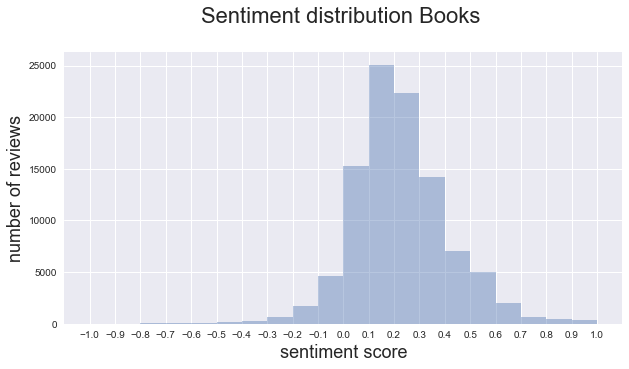

In [25]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_book_sample.sentiment, bins=20, kde=False, rug=False)
g.set_xticks(list(np.arange(-1, 1.01, 0.1)))
g.set_xlabel('sentiment score', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Sentiment distribution Books \n', fontsize=22)

sns.plt.show()

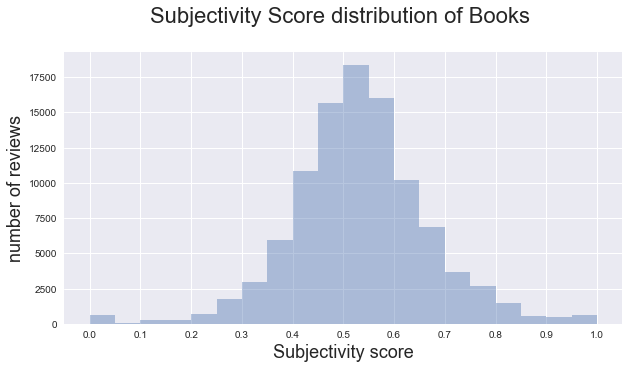

In [26]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_book_sample.subjectivity, bins=20, kde=False, rug=False)
g.set_xticks(list(np.arange(0, 1.01, 0.1)))
g.set_xlabel('Subjectivity score', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Subjectivity Score distribution of Books \n', fontsize=22)
sns.plt.show()

### Plotting Clothes Jewellery

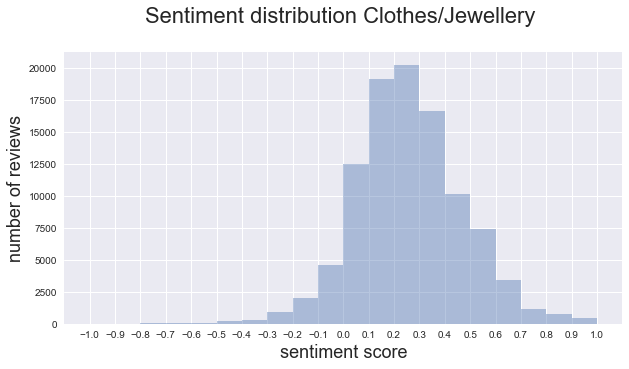

In [27]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_clothes_jewelry_sample.sentiment, bins=20, kde=False, rug=False)
g.set_xticks(list(np.arange(-1, 1.01, 0.1)))
g.set_xlabel('sentiment score', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Sentiment distribution Clothes/Jewellery \n', fontsize=22)
sns.plt.show()

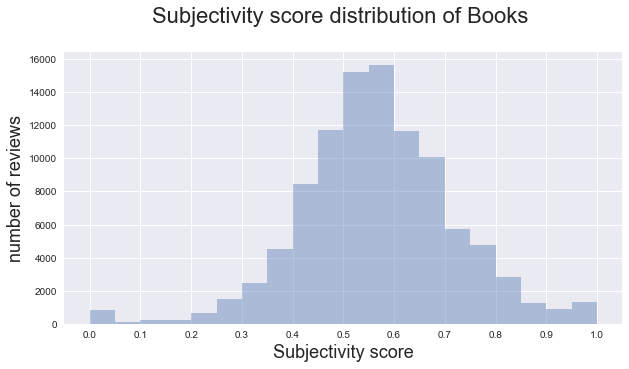

In [28]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_clothes_jewelry_sample.subjectivity, bins=20, kde=False, rug=False)
g.set_xticks(list(np.arange(0, 1.01, 0.1)))
g.set_xlabel('Subjectivity score', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Subjectivity score distribution of Books \n', fontsize=22)
sns.plt.show()

### Plotting Electronics

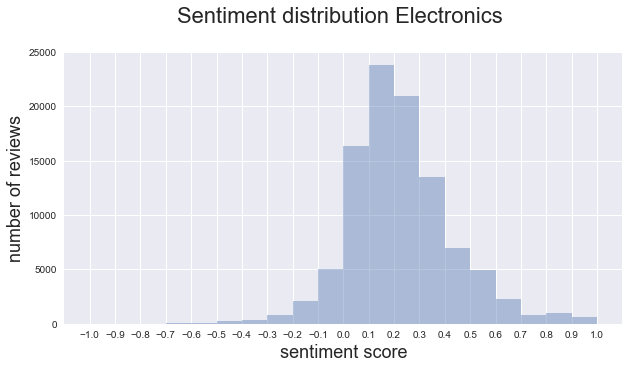

In [29]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_electronics_sample.sentiment, bins=20, kde=False, rug=False)
g.set_xticks(list(np.arange(-1, 1.01, 0.1)))
g.set_xlabel('sentiment score', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Sentiment distribution Electronics \n', fontsize=22)
sns.plt.show()

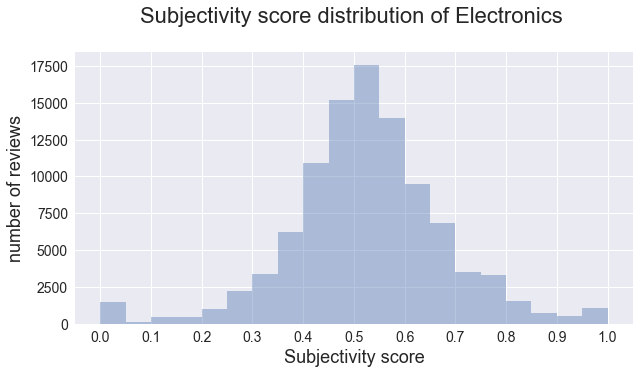

In [30]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_electronics_sample.subjectivity, bins=20, kde=False, rug=False)
g.set_xticks(list(np.arange(0, 1.01, 0.1)))
g.set_xlabel('Subjectivity score', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Subjectivity score distribution of Electronics \n', fontsize=22)
for item in g.get_yticklabels() + g.get_xticklabels():
    item.set_fontsize(14)
sns.plt.show()

### Plotting Movies

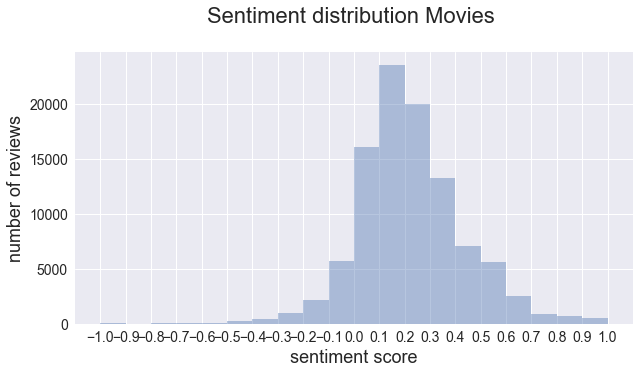

In [31]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_movies_sample.sentiment, bins=20, kde=False, rug=False)
g.set_xticks(list(np.arange(-1, 1.01, 0.1)))
g.set_xlabel('sentiment score', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Sentiment distribution Movies \n', fontsize=22)
for item in g.get_yticklabels() + g.get_xticklabels():
    item.set_fontsize(14)
sns.plt.show()

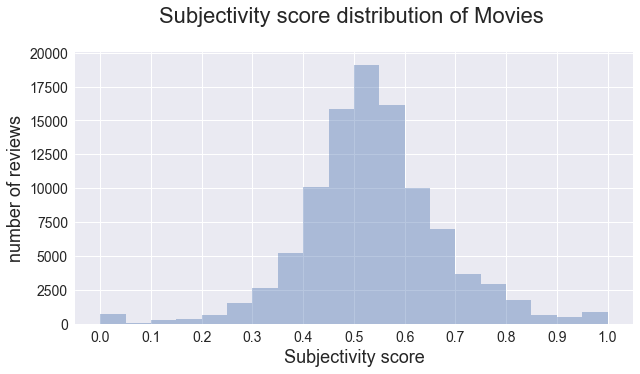

In [32]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_movies_sample.subjectivity, bins=20, kde=False, rug=False)
g.set_xticks(list(np.arange(0, 1.01, 0.1)))
g.set_xlabel('Subjectivity score', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Subjectivity score distribution of Movies \n', fontsize=22)
for item in g.get_yticklabels() + g.get_xticklabels():
    item.set_fontsize(14)
sns.plt.show()

## Hypothesis Testing

In [33]:
from scipy import stats

In [34]:
print(stats.f_oneway(reviews_book_sample.sentiment, reviews_clothes_jewelry_sample.sentiment, 
               reviews_electronics_sample.sentiment, reviews_movies_sample.sentiment
              ))
print('\nThere is high statistical differences in the sentiment scores between each products, ie, books, jewellery/ clothes, elecctronics, and movies')

F_onewayResult(statistic=761.29962229715954, pvalue=0.0)

There is high statistical differences in the sentiment scores between each products, ie, books, jewellery/ clothes, elecctronics, and movies


In [35]:
print(stats.f_oneway(reviews_book_sample.subjectivity, reviews_clothes_jewelry_sample.subjectivity, 
               reviews_electronics_sample.subjectivity, reviews_movies_sample.subjectivity
              ))

print('\nThere is high statistical differences in the subjectivity scores between each products, ie, books, jewellery/ clothes, elecctronics, and movies')

F_onewayResult(statistic=1499.2383538714375, pvalue=0.0)

There is high statistical differences in the subjectivity scores between each products, ie, books, jewellery/ clothes, elecctronics, and movies


### Helpfulness relation

In [36]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [37]:
def ratio(a):
    try:
        z =int(a[0])/int(a[1])
    except ZeroDivisionError:
        z = 0
    return z

In [38]:
reviews_book_sample['helpfulness_ratio'] = reviews_book_sample.helpful.map(tokenizer.tokenize)
reviews_book_sample['helpfulness_ratio'] = reviews_book_sample.helpfulness_ratio.apply(ratio)

In [39]:
reviews_clothes_jewelry_sample['helpfulness_ratio'] = reviews_clothes_jewelry_sample.helpful.map(tokenizer.tokenize)
reviews_clothes_jewelry_sample['helpfulness_ratio'] = reviews_clothes_jewelry_sample.helpfulness_ratio.apply(ratio)

In [40]:
reviews_electronics_sample['helpfulness_ratio'] = reviews_electronics_sample.helpful.map(tokenizer.tokenize)
reviews_electronics_sample['helpfulness_ratio'] = reviews_electronics_sample.helpfulness_ratio.apply(ratio)

In [41]:
reviews_movies_sample['helpfulness_ratio'] = reviews_movies_sample.helpful.map(tokenizer.tokenize)
reviews_movies_sample['helpfulness_ratio'] = reviews_movies_sample.helpfulness_ratio.apply(ratio)

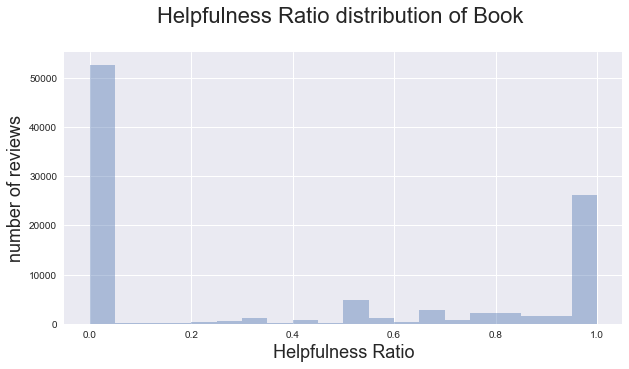

In [42]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_book_sample.helpfulness_ratio, bins=20, kde=False, rug=False)
g.set_xlabel('Helpfulness Ratio', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Helpfulness Ratio distribution of Book \n', fontsize=22)
sns.plt.show()

In [43]:
reviews_clothes_jewelry_sample.loc[reviews_clothes_jewelry_sample['helpfulness_ratio']>1]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment,subjectivity,binned_sentiment,binned_subjectivity,helpfulness_ratio
33916,A353U0L2HAMSHV,B000JD2614,"Cricket ""Living life and loving it!""","[4, 2]",I have been waiting for these to go on sale fo...,5.0,A gift for me!,1234828800,"02 17, 2009",0.110227,0.409091,0.0,2.0,2.0


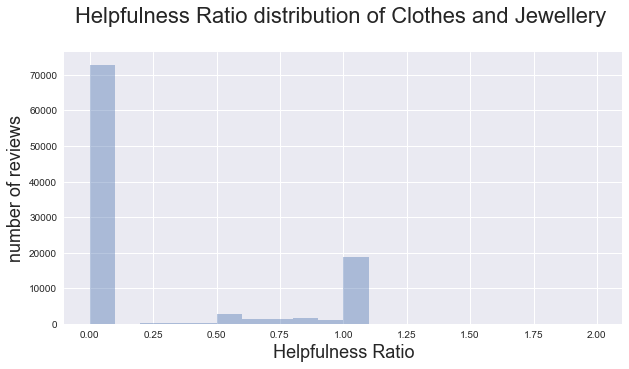

In [44]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_clothes_jewelry_sample.helpfulness_ratio, bins=20, kde=False, rug=False)
g.set_xlabel('Helpfulness Ratio', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Helpfulness Ratio distribution of Clothes and Jewellery \n', fontsize=22)
sns.plt.show()

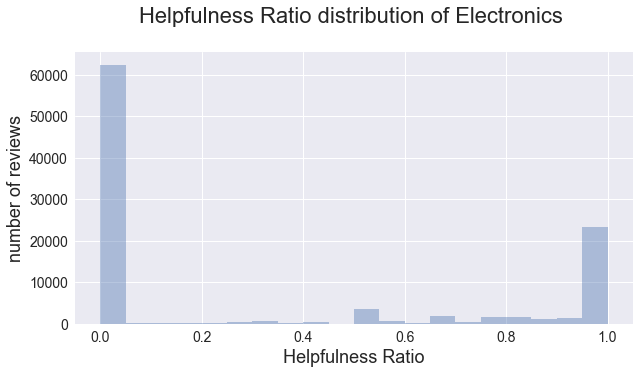

In [45]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_electronics_sample.helpfulness_ratio, bins=20, kde=False, rug=False)
g.set_xlabel('Helpfulness Ratio', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Helpfulness Ratio distribution of Electronics \n', fontsize=22)
for item in g.get_yticklabels() + g.get_xticklabels():
    item.set_fontsize(14)
sns.plt.show()

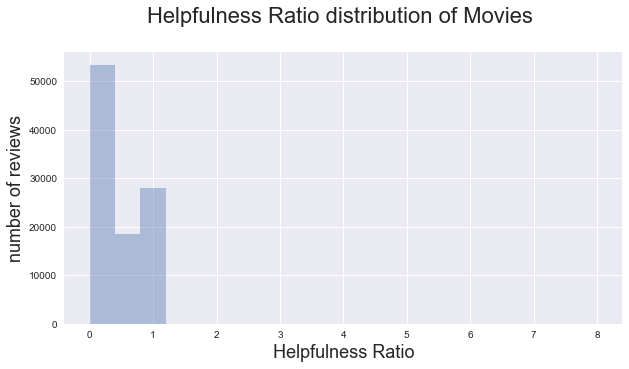

In [46]:
sns.plt.figure(figsize=(10, 5))
g = sns.distplot(reviews_movies_sample.helpfulness_ratio, bins=20, kde=False, rug=False)
g.set_xlabel('Helpfulness Ratio', fontsize=18)
g.set_ylabel('number of reviews', fontsize=18)
g.set_title('Helpfulness Ratio distribution of Movies \n', fontsize=22)
sns.plt.show()

In [47]:
p_val = stats.kruskal(reviews_movies_sample.helpfulness_ratio, reviews_book_sample.helpfulness_ratio, 
              reviews_clothes_jewelry_sample.helpfulness_ratio,
              reviews_electronics_sample.helpfulness_ratio
              )[1]
print('There is significant differences of helpfulness ratio scores between the different product categories as p-value is ',p_val)

There is significant differences of helpfulness ratio scores between the different product categories as p-value is  0.0


## Scatter Plot between Binned Sentiment scores and Helpfulness Ratio

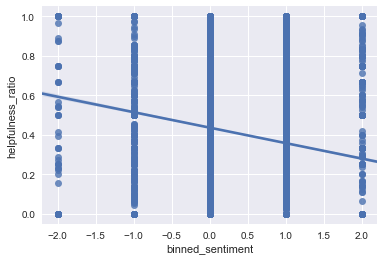

In [49]:
sns.regplot(reviews_book_sample.binned_sentiment, reviews_book_sample.helpfulness_ratio)

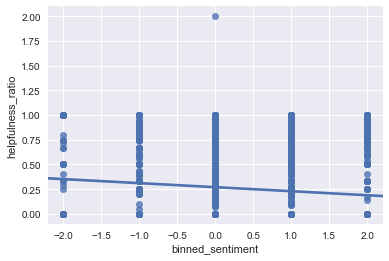

In [51]:
sns.regplot(reviews_clothes_jewelry_sample.binned_sentiment, reviews_clothes_jewelry_sample.helpfulness_ratio)

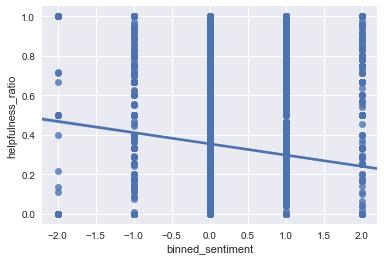

In [52]:
sns.regplot(reviews_electronics_sample.binned_sentiment, reviews_electronics_sample.helpfulness_ratio)

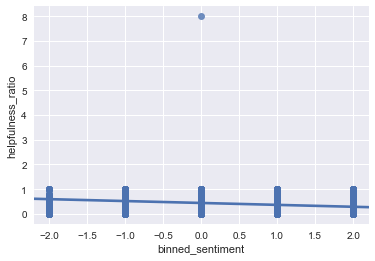

In [53]:
sns.regplot(reviews_movies_sample.binned_sentiment, reviews_movies_sample.helpfulness_ratio)

In [57]:
metadata_books = pd.merge(reviews_book_sample, metadata_sample, on='asin')

metadata_clothes = pd.merge(reviews_clothes_jewelry_sample, metadata_sample, on='asin')

metadata_electronics = pd.merge(reviews_electronics_sample, metadata_sample, on='asin')

metadata_movies = pd.merge(reviews_movies_sample, metadata_sample, on='asin')

In [58]:
metadata_books = metadata_books.drop('Unnamed: 0', 1)

metadata_clothes = metadata_clothes.drop('Unnamed: 0', 1)

metadata_electronics = metadata_electronics.drop('Unnamed: 0', 1)

metadata_movies = metadata_movies.drop('Unnamed: 0', 1)

## Plotting Correleation Maps on the merged data

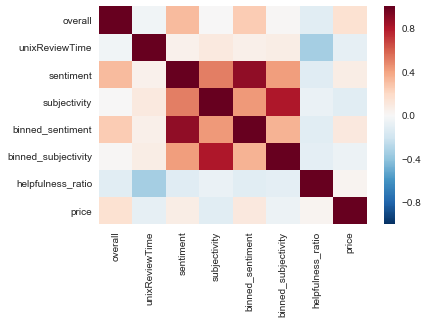

In [59]:
sns.heatmap(metadata_clothes.corr())

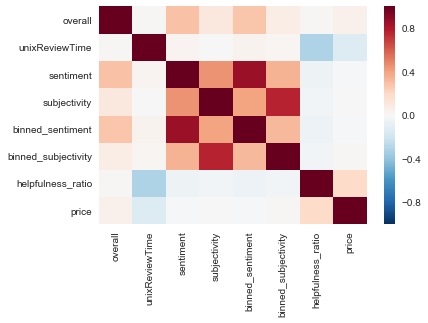

In [60]:
sns.heatmap(metadata_electronics.corr())

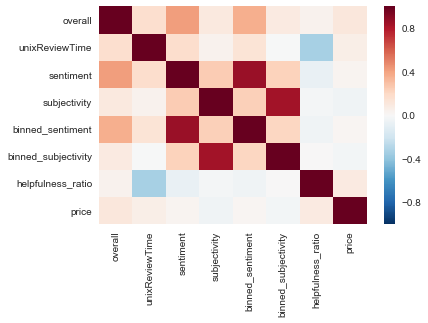

In [61]:
sns.heatmap(metadata_movies.corr())

## Scatter Plots to show relationship between helpfulness ratio and price

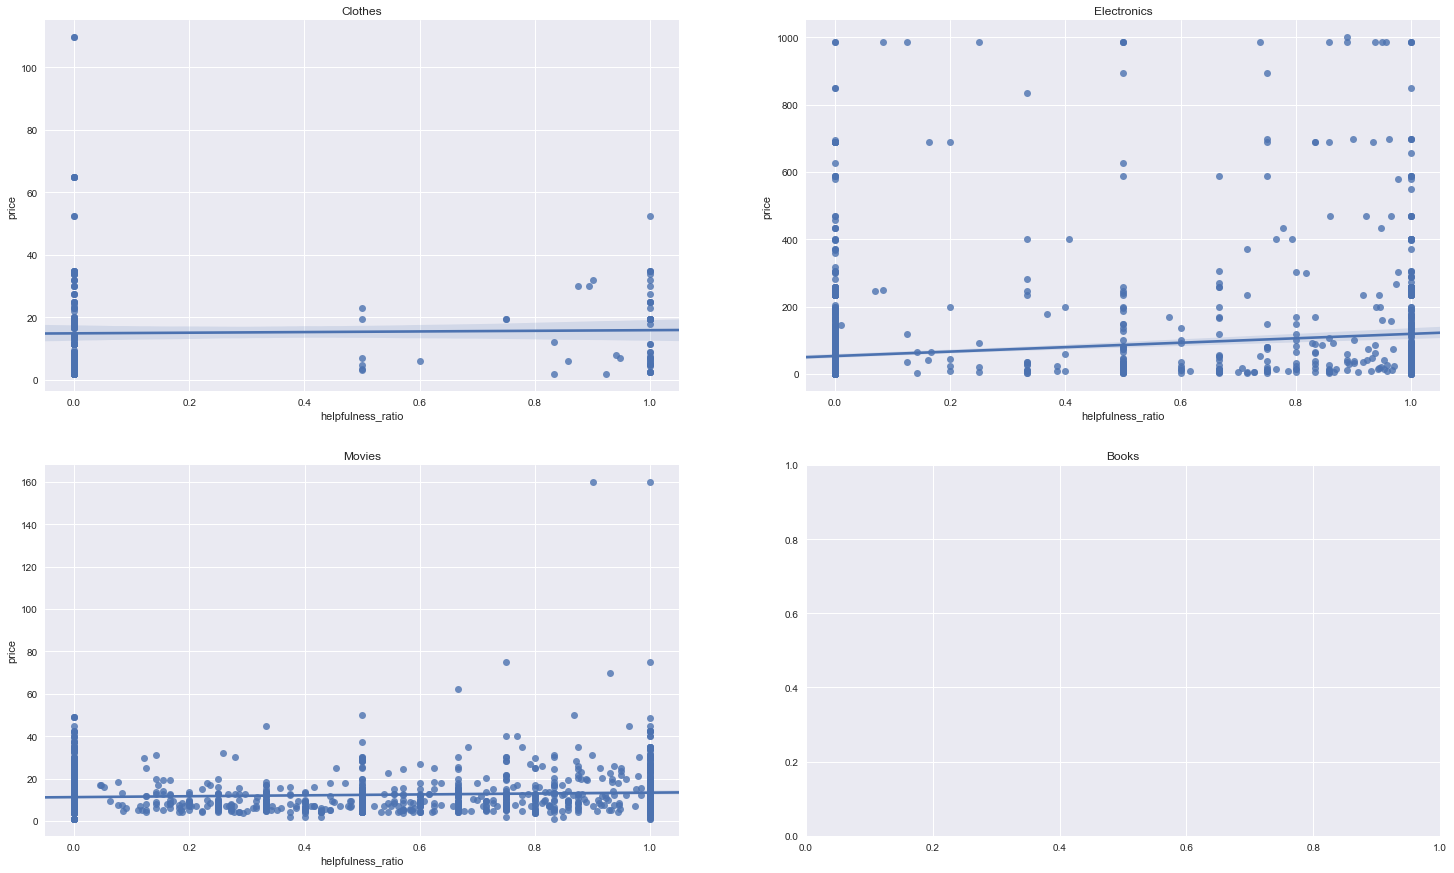

In [64]:
plt.figure(figsize=(25,15))
plt.subplot(2, 2, 1)
plt.title('Clothes')
sns.regplot( metadata_clothes.helpfulness_ratio, metadata_clothes.price)
plt.subplot(2, 2, 2)
plt.title('Electronics')
sns.regplot( metadata_electronics.helpfulness_ratio, metadata_electronics.price)
plt.subplot(2, 2, 3)
plt.title('Movies')
sns.regplot( metadata_movies.helpfulness_ratio, metadata_movies.price)
plt.subplot(2, 2, 4)
plt.title('Books')
#sns.regplot( metadata_books.helpfulness_ratio, metadata_books.price)

## Performing Pearson's correleation Test

In [65]:
stats.pearsonr( metadata_movies.helpfulness_ratio, metadata_movies.price)

(0.091495695471940877, 7.6249861633395744e-05)

In [66]:
stats.pearsonr( metadata_clothes.helpfulness_ratio, metadata_clothes.price)

(0.026354522261948614, 0.68207885062160678)

In [67]:
stats.pearsonr( metadata_electronics.helpfulness_ratio, metadata_electronics.price)

(0.19150773658719722, 1.2937802782992791e-18)

In [68]:
print('The conclusion is, there is high correleation between price and helpfulness ratio of different products')

The conclusion is, there is high correleation between price and helpfulness ratio of different products


## BOX PLOT comparison

## Sentiment Vs Helpfulness Ratio

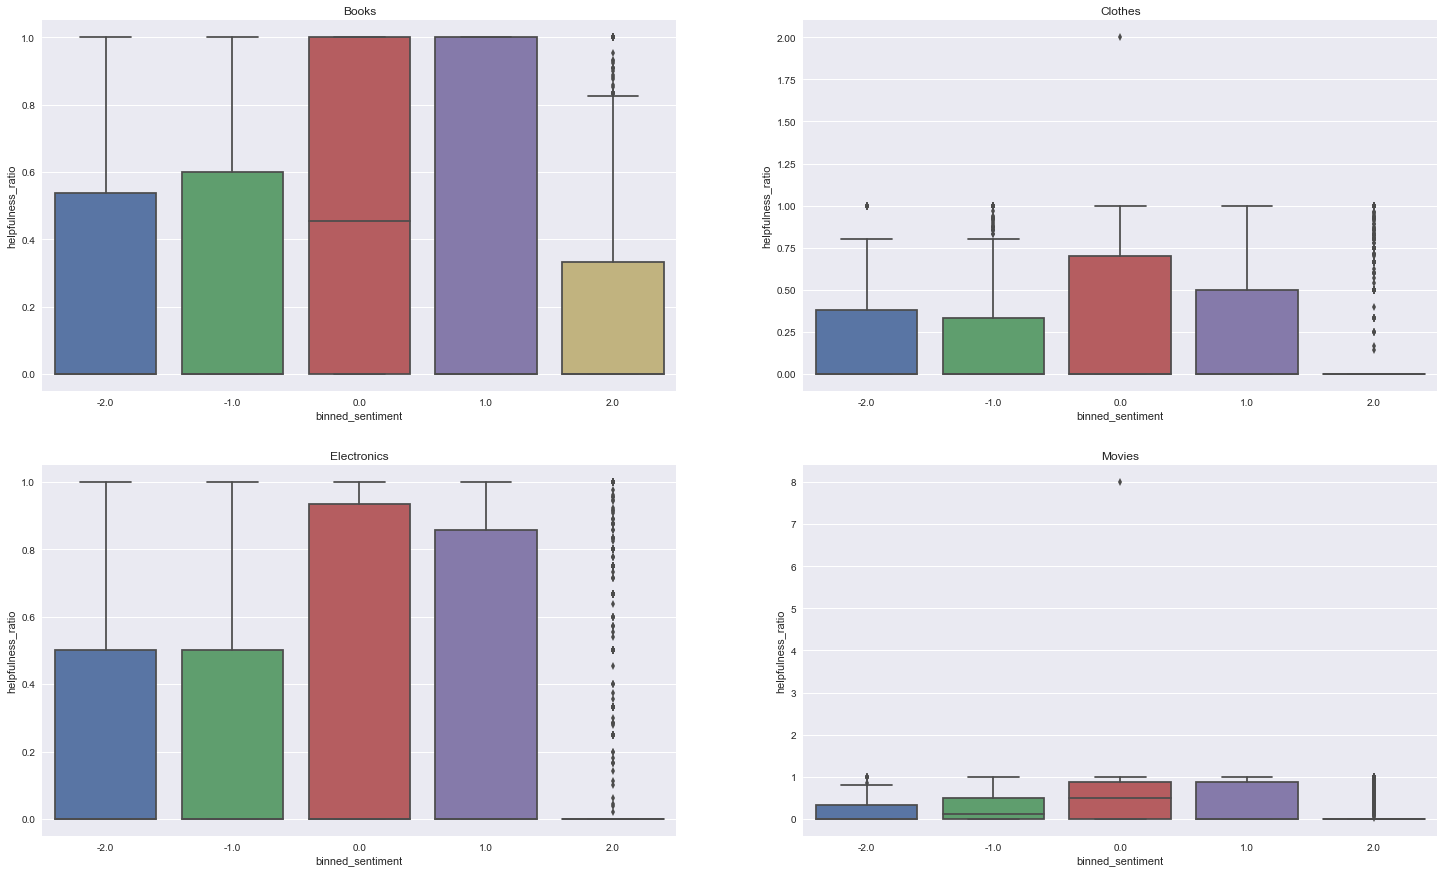

In [69]:
plt.figure(figsize=(25,15))
plt.subplot(2, 2, 1)
plt.title('Books')
sns.boxplot(x="binned_sentiment",y='helpfulness_ratio',data=reviews_book_sample)
plt.subplot(2, 2, 2)
plt.title('Clothes')
sns.boxplot(x="binned_sentiment",y='helpfulness_ratio',data=reviews_clothes_jewelry_sample)
plt.subplot(2, 2, 3)
plt.title('Electronics')
sns.boxplot(x="binned_sentiment",y='helpfulness_ratio',data=reviews_electronics_sample)
plt.subplot(2, 2, 4)
plt.title('Movies')
sns.boxplot(x="binned_sentiment",y='helpfulness_ratio',data=reviews_movies_sample)

## Subjectivity vs Helpfulness Ratio

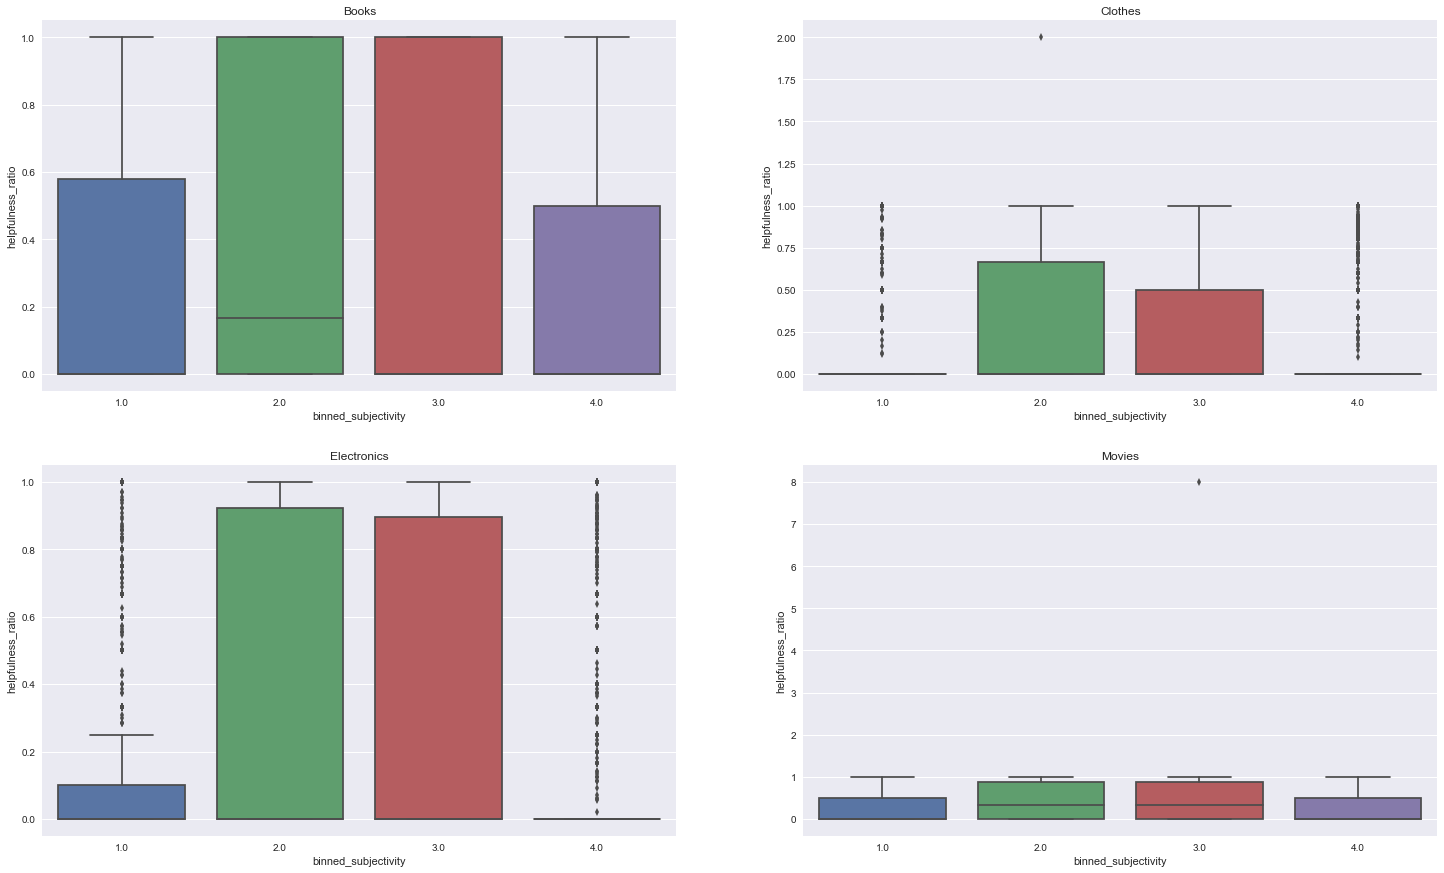

In [70]:
plt.figure(figsize=(25,15))
plt.subplot(2, 2, 1)
plt.title('Books')
sns.boxplot(x="binned_subjectivity",y='helpfulness_ratio',data=reviews_book_sample)
plt.subplot(2, 2, 2)
plt.title('Clothes')
sns.boxplot(x="binned_subjectivity",y='helpfulness_ratio',data=reviews_clothes_jewelry_sample)
plt.subplot(2, 2, 3)
plt.title('Electronics')
sns.boxplot(x="binned_subjectivity",y='helpfulness_ratio',data=reviews_electronics_sample)
plt.subplot(2, 2, 4)
plt.title('Movies')
sns.boxplot(x="binned_subjectivity",y='helpfulness_ratio',data=reviews_movies_sample)

## Helpfulness vs Price

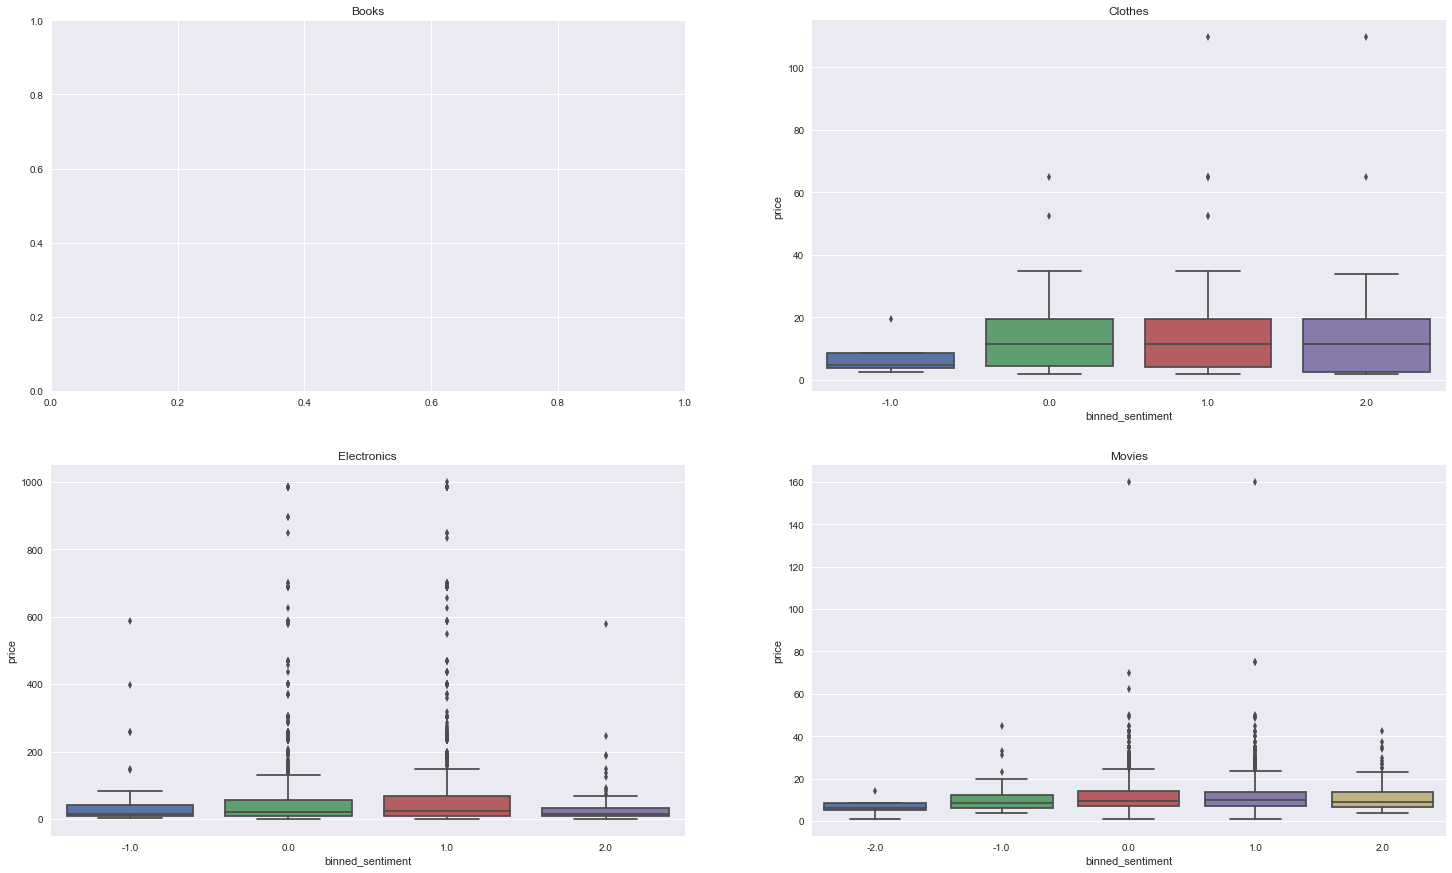

In [71]:
plt.figure(figsize=(25,15))
plt.subplot(2, 2, 1)
plt.title('Books')
#sns.boxplot(x="binned_subjectivity",y='helpfulness_ratio',data=reviews_book_sample)
plt.subplot(2, 2, 2)
plt.title('Clothes')
sns.boxplot(x="binned_sentiment",y='price',data=metadata_clothes)
plt.subplot(2, 2, 3)
plt.title('Electronics')
sns.boxplot(x="binned_sentiment",y='price',data=metadata_electronics)
plt.subplot(2, 2, 4)
plt.title('Movies')
sns.boxplot(x="binned_sentiment",y='price',data=metadata_movies)

## Overall rating vs Sentiment score

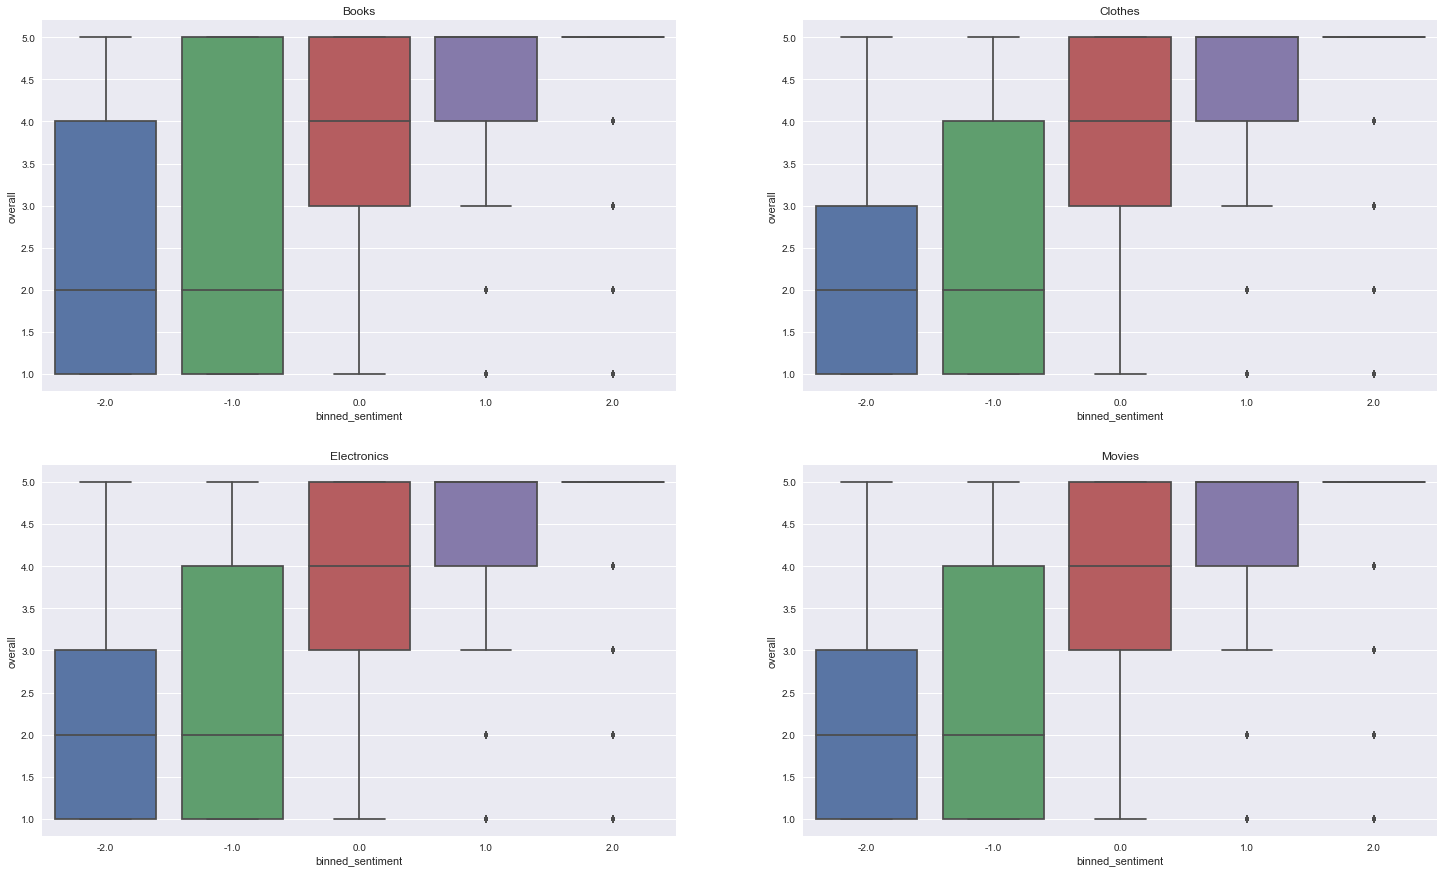

In [72]:
plt.figure(figsize=(25,15))
plt.subplot(2, 2, 1)
plt.title('Books')
sns.boxplot(x="binned_sentiment",y='overall',data=reviews_book_sample)
plt.subplot(2, 2, 2)
plt.title('Clothes')
sns.boxplot(x="binned_sentiment",y='overall',data=reviews_clothes_jewelry_sample)
plt.subplot(2, 2, 3)
plt.title('Electronics')
sns.boxplot(x="binned_sentiment",y='overall',data=reviews_movies_sample)
plt.subplot(2, 2, 4)
plt.title('Movies')
sns.boxplot(x="binned_sentiment",y='overall',data=reviews_movies_sample)

In [73]:
print(' Pearson score for books and overall rating ',stats.pearsonr(reviews_book_sample.binned_sentiment, reviews_book_sample.overall))

print(' Pearson score for jewellery and clothes and overall rating',stats.pearsonr(reviews_clothes_jewelry_sample.binned_sentiment, reviews_clothes_jewelry_sample.overall))

print(' Pearson score for electronics and overall rating ', stats.pearsonr(reviews_electronics_sample.binned_sentiment, reviews_electronics_sample.overall))

print( ' Pearson score for movies and overall rating ', stats.pearsonr(reviews_movies_sample.binned_sentiment, reviews_movies_sample.overall))

 Pearson score for books and overall rating  (0.30288314776274766, 0.0)
 Pearson score for jewellery and clothes and overall rating (0.37827620643967952, 0.0)
 Pearson score for electronics and overall rating  (0.31107659059491777, 0.0)
 Pearson score for movies and overall rating  (0.37951999571176259, 0.0)


## Cosine similarity matrix for checking the pattern of a particular review for a particular product by comparing it with rest of the review for that product

(Reference:http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)

In [78]:
cosine_data = metadata_electronics.loc[metadata_electronics['asin'] == 'B003ZUXXWO']
review_list = cosine_data.reviewText.tolist()
print("How many same type products are in the list ? ",len(review_list))
cosine_data.head()
labels = cosine_data.reviewerID.tolist()

How many same type products are in the list ?  12


In [79]:
def Cosine_similarity(a_list, i):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity
    import math 
    vector_tfid = TfidfVectorizer()
    matrix_vector_tfid = vector_tfid.fit_transform(a_list)
    print(matrix_vector_tfid.shape)
    return(cosine_similarity(matrix_vector_tfid[:i], matrix_vector_tfid))

In [80]:
cos_similarity = Cosine_similarity(review_list,len(review_list))

(12, 349)


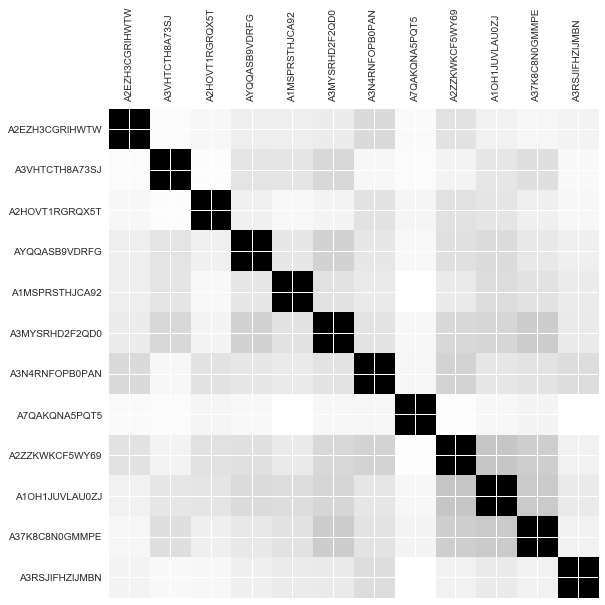

In [81]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(9,9))
ax.grid(True)
cax = ax.matshow(cos_similarity, interpolation='nearest')
plt.xticks(range(len(cos_similarity)), labels,rotation=90 )
plt.yticks(range(len(cos_similarity)), labels)
#plt.title('Cosine Similarity Matrix with reviewer ID')
plt.show()

## Recommender System 

In [82]:
metadata_combined_all_books = pd.merge(reviews_book, metadata, on='asin')

metadata_combined_all_jewelry = pd.merge(reviews_clothes_jewelry, metadata,  on='asin')

metadata_combined_all_electronics = pd.merge( reviews_electronics,metadata, on='asin')

metadata_combined_all_movies = pd.merge( reviews_movies,metadata, on='asin')

In [83]:
#Class for Item similarity based Recommender System model
import pandas as pd
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.products_dict = None
        self.rev_products_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (products) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (products) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_products, all_products):
            
        ####################################
        #Get users for all products in user_products.
        ####################################
        user_products_users = []        
        for i in range(0, len(user_products)):
            user_products_users.append(self.get_item_users(user_products[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_products) X len(products)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_products), len(all_products))), float)
           
        #############################################################
        #Calculate similarity between user products and all unique products
        #in the training data
        #############################################################
        for i in range(0,len(all_products)):
            #Calculate unique listeners (users) of song (item) i
            products_i_data = self.train_data[self.train_data[self.item_id] == all_products[i]]
            users_i = set(products_i_data[self.user_id].unique())
            
            for j in range(0,len(user_products)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_products_users[j]
                    
                #Calculate intersection of listeners of products i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of products i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_products, user_products):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user products.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['reviewerID', 'asin', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_products[sort_index[i][1]] not in user_products and rank <= 10:
                df.loc[len(df)]=[user,all_products[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no products for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique products for this user
        ########################################
        user_products = self.get_user_items(user)    
            
        print("No. of unique products for the user: %d" % len(user_products))
        
        ######################################################
        #B. Get all unique items (products) in the training data
        ######################################################
        all_products = self.get_all_items_train_data()
        
        print("no. of unique products in the training set: %d" % len(all_products))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_products) X len(products)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_products, all_products)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_products, user_products)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_products = item_list
        
        ######################################################
        #B. Get all unique items (products) in the training data
        ######################################################
        all_products = self.get_all_items_train_data()
        
        print("no. of unique products in the training set: %d" % len(all_products))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_products) X len(products)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_products, all_products)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_products, user_products)
         
        return df_recommendations

In [84]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(metadata_combined_all_electronics[['reviewerID', 'asin']], test_size = 0.20, random_state=0)

In [85]:
is_model = item_similarity_recommender_py()
is_model.create(metadata_combined_all_electronics[['reviewerID', 'asin']], 'reviewerID', 'asin')

user_id = 'A36VW5CH311KDL'
user_items = is_model.get_user_items(user_id)

print("------------------------------------------------------------------------------------")
print("Training Products for the user Reviewer Id: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

------------------------------------------------------------------------------------
Training Products for the user Reviewer Id: A36VW5CH311KDL:
------------------------------------------------------------------------------------
B0013A1XDE
B002RARGOO
B006UMM2BW
B0092MD5UY
B00931S35G
B0096W1OCG
B00ATM1MHO


In [86]:
print("----------------------------------------------------------------------")
print("Top 5 viewed items for Reviewer Id A36VW5CH311KDL")
print("----------------------------------------------------------------------")
metadata_combined_all_electronics[(metadata_combined_all_electronics.reviewerID == 'A36VW5CH311KDL') ]['asin'].value_counts()[:5]

----------------------------------------------------------------------
Top 5 viewed items for Reviewer Id A36VW5CH311KDL
----------------------------------------------------------------------


B002RARGOO    1
B0092MD5UY    1
B0096W1OCG    1
B00ATM1MHO    1
B0013A1XDE    1
Name: asin, dtype: int64

In [87]:
print("----------------------------------------------------------------------")
print("Recommendation process going on for Reviewer Id A36VW5CH311KDL:")
print("----------------------------------------------------------------------")
is_model.recommend('A36VW5CH311KDL')

----------------------------------------------------------------------
Recommendation process going on for Reviewer Id A36VW5CH311KDL:
----------------------------------------------------------------------
No. of unique products for the user: 7
no. of unique products in the training set: 9938
Non zero values in cooccurence_matrix :1482


,reviewerID,asin,score,rank
0,A36VW5CH311KDL,B0013DCOZC,0.027332,1
1,A36VW5CH311KDL,B002KMIZIU,0.015873,2
2,A36VW5CH311KDL,B00DCM0DUU,0.014076,3
3,A36VW5CH311KDL,B000UXDHOI,0.013559,4
4,A36VW5CH311KDL,B005KBB79C,0.013475,5
5,A36VW5CH311KDL,B00004Z61H,0.012987,6
6,A36VW5CH311KDL,B0043RS864,0.011351,7
7,A36VW5CH311KDL,B005IHAIEI,0.011165,8
8,A36VW5CH311KDL,B006UL00R6,0.010650,9
9,A36VW5CH311KDL,B000HJPK2C,0.010036,10
